<a href="https://colab.research.google.com/github/MohsenJadidi/ISLR/blob/master/Assignment3/Q1(first_step).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Q1 (Fraud-detection using logistic regression)
Statistical Learning Theory Course - Fall 2020 @ AUT

Author: https://ipythonquant.wordpress.com/2018/05/08/from-logistic-regression-in-scikit-learn-to-deep-learning-with-tensorflow-a-fraud-detection-case-study-part-i/

Modify and extend by: MohammadMohsen Jadidi | email : mohsenjadidi@aut.ac.ir

## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read Dataset

Number of Class 0 =  181766
Number of Class 1 =  365
(numClass0/(numClass0+numClass1))*100 = 99.799595


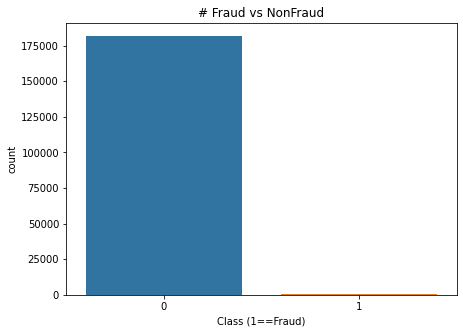

In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

address = '/content/drive/My Drive/ISLR Course - Fall 2020/Assignment3/creditcard.csv'
credit_card = pd.read_csv(address)

f, ax = plt.subplots(figsize=(7, 5))
sn.countplot(x='Class', data=credit_card)
_ = plt.title('# Fraud vs NonFraud')
_ = plt.xlabel('Class (1==Fraud)')

numClass0 = credit_card['Class'].value_counts()[0]
numClass1 = credit_card['Class'].value_counts()[1]

print('Number of Class 0 = ', numClass0)
print('Number of Class 1 = ', numClass1)
print('(numClass0/(numClass0+numClass1))*100 = {:4f}'.format(numClass0/(numClass0+numClass1)*100))

## Preprocessing

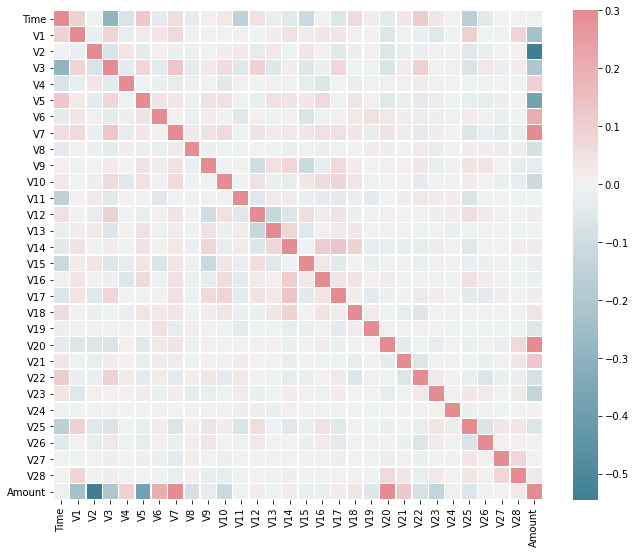

In [5]:
from sklearn.model_selection import train_test_split

X = credit_card.drop(columns='Class', axis=1)
y = credit_card.Class.values

corr = X.corr() # correlation matrix 

#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
cmap = sn.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
sn.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5)

np.random.seed(seed=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Logistic Regression

Train accuracy: 99.8975 %
Train AUC: 97.8695 %
Test accuracy: 99.9012 %
Test AUC: 97.8463 %


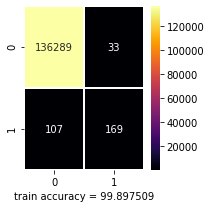

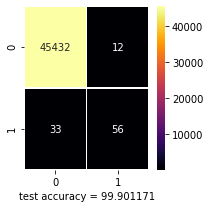

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
'''
scaler = StandardScaler()
lr = LogisticRegression()
model1 = Pipeline([('standardize', scaler), ('log_reg', lr)])
model1.fit(X_train, y_train)

y_train_hat = model1.predict(X_train)
y_train_hat_probs = model1.predict_proba(X_train)[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
print('Training accuracy: %.4f %%' % train_accuracy)
print('Training AUC: %.4f %%' % train_auc_roc)
'''
scaler = StandardScaler()
regressor = LogisticRegression()
regressor.fit(scaler.fit_transform(X_train), y_train)

y_train_hat = regressor.predict(scaler.transform(X_train))
y_train_hat_probs = regressor.predict_proba(scaler.transform(X_train))[:,1]
train_accuracy = accuracy_score(y_train, y_train_hat)*100
train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
confusionMatrix = confusion_matrix(y_train, y_train_hat)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('train accuracy = {:4f}'.format(train_accuracy))
plt.tight_layout()
print('Train accuracy: %.4f %%' % train_accuracy)
print('Train AUC: %.4f %%' % train_auc_roc)

y_test_hat = regressor.predict(scaler.transform(X_test))
y_test_hat_probs = regressor.predict_proba(scaler.transform(X_test))[:,1]
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
confusionMatrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
plt.xlabel('test accuracy = {:4f}'.format(test_accuracy))
plt.tight_layout()
print('Test accuracy: %.4f %%' % test_accuracy)
print('Test AUC: %.4f %%' % test_auc_roc)

## Receiver-Operator-Curve

              precision    recall  f1-score   support

           0   0.998967  0.999824  0.999395     45444
           1   0.840000  0.471910  0.604317        89

    accuracy                       0.998792     45533
   macro avg   0.919483  0.735867  0.801856     45533
weighted avg   0.998656  0.998792  0.998623     45533



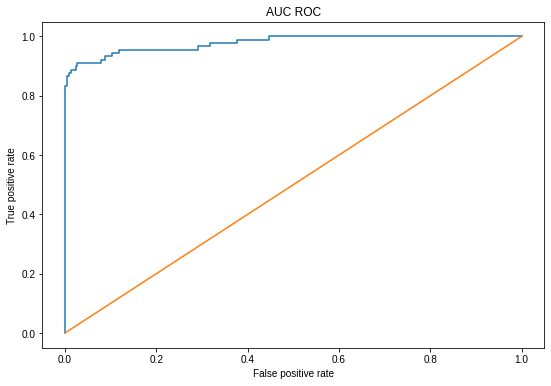

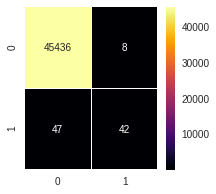

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat_probs, drop_intermediate=True)
 
f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

# Assume that set the threshold to 90% 
y_hat_90 = (y_test_hat_probs > 0.90 )*1
confusionMatrix = confusion_matrix(y_test, y_hat_90)
plt.figure(figsize=[3,3])
sn.heatmap(confusionMatrix, cmap='inferno', annot=True, fmt='d', linewidths=.25)
print(classification_report(y_test, y_hat_90, digits=6))

## LogisticRegression with Tensorflow2